In [1]:
from fooof import FOOOF, FOOOFGroup, fit_fooof_3d
import pandas as pd
import os.path as op
import sys
import scipy.signal
import mne
import os
from fooof.sim.gen import gen_aperiodic
import numpy as np
import matplotlib.pyplot as plt
import debugpy

from mne.io import read_epochs_fieldtrip
from mne import create_info
from burst_detection import extract_bursts


In [2]:
base_dir = r'C:\Users\mgautier\Desktop\DEVMOBETA\eeg_data\devmobeta\data'
subjects = pd.read_csv(op.join(base_dir, 'participants.tsv'), sep='\t')
subject_ids = subjects['participant_id']
c_cluster_chans = ['E35', 'E30', 'E36', 'E42','E41', 'E37', 'E104', 'E105', 'E103','E110','E87','E93']
n_chans=129
sub_epoch_psds={}
pipeline='NEARICA_NF'
age='twelve'

In [3]:
def compute_psds(age):
    sub_epoch_psds=[]

    for subject_id in subject_ids:

        path = op.join(base_dir, 'derivatives', pipeline,age, subject_id, '05_final_zapped_data')
        out_path = op.join(base_dir, 'derivatives', pipeline, age, subject_id)
        if os.path.exists(op.join(path, '%s_task-grasping_eeg_final_zapped_old_new.set' %(subject_id))):
            EEG = mne.read_epochs_eeglab(op.join(path, '%s_task-grasping_eeg_final_zapped_old_new.set' %(subject_id)))
            srate = EEG.info['sfreq']
            c_chan_idx = []
            for chan in c_cluster_chans:
                c_chan_idx.append(EEG.info['ch_names'].index(chan))
            data = EEG.get_data()
            n_trials = data.shape[0]
            n_chans = data.shape[1]
            n_samps = data.shape[2]

            winsize = srate
            overlap = int(winsize / 2)
            chan_psd = np.zeros((n_chans, 400))
            for chan in range(n_chans):
                chan_data = data[:, chan, :]

                freqs, psd = scipy.signal.welch(chan_data, fs=srate, window='hann', nperseg = winsize, noverlap = overlap, nfft = 2000, detrend = 'constant', return_onesided = True, scaling = 'density', axis = - 1, average = 'mean')
                f_idx = (freqs >= .1) & (freqs <= 100)
                freqs = freqs[f_idx]
                psd = psd[:, f_idx]
                chan_psd[chan,:]= np.mean(psd, axis=0)
            sub_epoch_psds.append(chan_psd)

        else:
            continue

    sub_task_psds = np.array(sub_epoch_psds)
    np.save('sub_task_psds_{}.npy'.format(age), sub_task_psds)
    return c_chan_idx, freqs, sub_task_psds

In [4]:
c_chan_idx, freqs,sub_task_psds_twelve=compute_psds('twelve')

Extracting parameters from C:\Users\mgautier\Desktop\DEVMOBETA\eeg_data\devmobeta\data\derivatives\NEARICA_NF\twelve\sub-203\05_final_zapped_data\sub-203_task-grasping_eeg_final_zapped_old_new.set...
Not setting metadata
17 matching events found
No baseline correction applied
0 projection items activated
Ready.


C:\Users\mgautier\AppData\Local\Temp/ipykernel_8020/800620504.py:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  EEG = mne.read_epochs_eeglab(op.join(path, '%s_task-grasping_eeg_final_zapped_old_new.set' %(subject_id)))


Extracting parameters from C:\Users\mgautier\Desktop\DEVMOBETA\eeg_data\devmobeta\data\derivatives\NEARICA_NF\twelve\sub-207\05_final_zapped_data\sub-207_task-grasping_eeg_final_zapped_old_new.set...
Not setting metadata
19 matching events found
No baseline correction applied
0 projection items activated
Ready.


C:\Users\mgautier\AppData\Local\Temp/ipykernel_8020/800620504.py:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  EEG = mne.read_epochs_eeglab(op.join(path, '%s_task-grasping_eeg_final_zapped_old_new.set' %(subject_id)))


Extracting parameters from C:\Users\mgautier\Desktop\DEVMOBETA\eeg_data\devmobeta\data\derivatives\NEARICA_NF\twelve\sub-208\05_final_zapped_data\sub-208_task-grasping_eeg_final_zapped_old_new.set...
Not setting metadata
46 matching events found
No baseline correction applied


C:\Users\mgautier\AppData\Local\Temp/ipykernel_8020/800620504.py:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  EEG = mne.read_epochs_eeglab(op.join(path, '%s_task-grasping_eeg_final_zapped_old_new.set' %(subject_id)))


0 projection items activated
Ready.
Extracting parameters from C:\Users\mgautier\Desktop\DEVMOBETA\eeg_data\devmobeta\data\derivatives\NEARICA_NF\twelve\sub-203\05_final_zapped_data\sub-203_task-grasping_eeg_final_zapped_old_new.set...
Not setting metadata
17 matching events found
No baseline correction applied
0 projection items activated
Ready.


C:\Users\mgautier\AppData\Local\Temp/ipykernel_8020/800620504.py:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  EEG = mne.read_epochs_eeglab(op.join(path, '%s_task-grasping_eeg_final_zapped_old_new.set' %(subject_id)))


Extracting parameters from C:\Users\mgautier\Desktop\DEVMOBETA\eeg_data\devmobeta\data\derivatives\NEARICA_NF\twelve\sub-207\05_final_zapped_data\sub-207_task-grasping_eeg_final_zapped_old_new.set...
Not setting metadata
19 matching events found
No baseline correction applied
0 projection items activated
Ready.


C:\Users\mgautier\AppData\Local\Temp/ipykernel_8020/800620504.py:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  EEG = mne.read_epochs_eeglab(op.join(path, '%s_task-grasping_eeg_final_zapped_old_new.set' %(subject_id)))


Extracting parameters from C:\Users\mgautier\Desktop\DEVMOBETA\eeg_data\devmobeta\data\derivatives\NEARICA_NF\twelve\sub-208\05_final_zapped_data\sub-208_task-grasping_eeg_final_zapped_old_new.set...
Not setting metadata
46 matching events found
No baseline correction applied
0 projection items activated
Ready.


C:\Users\mgautier\AppData\Local\Temp/ipykernel_8020/800620504.py:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  EEG = mne.read_epochs_eeglab(op.join(path, '%s_task-grasping_eeg_final_zapped_old_new.set' %(subject_id)))


Extracting parameters from C:\Users\mgautier\Desktop\DEVMOBETA\eeg_data\devmobeta\data\derivatives\NEARICA_NF\twelve\sub-207\05_final_zapped_data\sub-207_task-grasping_eeg_final_zapped_old_new.set...
Not setting metadata
19 matching events found
No baseline correction applied
0 projection items activated
Ready.


C:\Users\mgautier\AppData\Local\Temp/ipykernel_8020/800620504.py:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  EEG = mne.read_epochs_eeglab(op.join(path, '%s_task-grasping_eeg_final_zapped_old_new.set' %(subject_id)))


Extracting parameters from C:\Users\mgautier\Desktop\DEVMOBETA\eeg_data\devmobeta\data\derivatives\NEARICA_NF\twelve\sub-208\05_final_zapped_data\sub-208_task-grasping_eeg_final_zapped_old_new.set...
Not setting metadata
46 matching events found
No baseline correction applied
0 projection items activated
Ready.


C:\Users\mgautier\AppData\Local\Temp/ipykernel_8020/800620504.py:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  EEG = mne.read_epochs_eeglab(op.join(path, '%s_task-grasping_eeg_final_zapped_old_new.set' %(subject_id)))


Extracting parameters from C:\Users\mgautier\Desktop\DEVMOBETA\eeg_data\devmobeta\data\derivatives\NEARICA_NF\twelve\sub-203\05_final_zapped_data\sub-203_task-grasping_eeg_final_zapped_old_new.set...
Not setting metadata
17 matching events found
No baseline correction applied
0 projection items activated
Ready.


C:\Users\mgautier\AppData\Local\Temp/ipykernel_8020/800620504.py:9: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  EEG = mne.read_epochs_eeglab(op.join(path, '%s_task-grasping_eeg_final_zapped_old_new.set' %(subject_id)))


In [5]:
def fooof(age, freqs, sub_task_psds):
    input_dir= r'C:\Users\mgautier\Projects\eeg\analysis'
    sub_task_psds=np.load((os.path.join(input_dir,'sub_task_psds_%s.npy' %(age))))

    fg=FOOOFGroup()
    freq_range=[0.1,100]
    fgs=fit_fooof_3d(fg, freqs, sub_task_psds, freq_range)

    sub_periodic = np.zeros(sub_task_psds.shape)
    sub_aperiodic = np.zeros(sub_task_psds.shape)

    for s_idx, fg in enumerate(fgs):
        fg.save_report('FOOOFGroup_report_{}_{}'.format(subject_ids[s_idx], age))
        print(fg)

        for chan in range(n_chans):
            if chan in fg.null_inds_:
                sub_periodic[s_idx, chan, :] = float('NaN')
                sub_aperiodic[s_idx, chan, :] = float('NaN')
            else:
                fm = fg.get_fooof(ind=chan, regenerate=True)
                ap_params = fm.get_params('aperiodic_params')
                peak_params=fm.get_params('peak_params')
                sub_aperiodic[s_idx, chan, :] = gen_aperiodic(freqs, ap_params)
                sub_periodic[s_idx, chan, :] = np.log10(sub_task_psds[s_idx,chan, :]) - sub_aperiodic[s_idx,chan, :]

        np.save('sub_aperiodic_{}.npy'.format(age), sub_aperiodic)
        np.save('sub_periodic_{}.npy'.format(age), sub_periodic)
    return fgs, sub_periodic, sub_aperiodic

In [6]:
fgs, sub_periodic_twelve, sub_aperiodic_twelve=fooof('twelve', freqs, sub_task_psds_twelve)

Running FOOOFGroup across 129 power spectra.
Running FOOOFGroup across 129 power spectra.
Running FOOOFGroup across 129 power spectra.
Running FOOOFGroup across 129 power spectra.
Running FOOOFGroup across 129 power spectra.
Running FOOOFGroup across 129 power spectra.
Running FOOOFGroup across 129 power spectra.
Running FOOOFGroup across 129 power spectra.
Running FOOOFGroup across 129 power spectra.


C:\Users\mgautier\miniconda\lib\site-packages\fooof\objs\group.py:378: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  out = np.array([np.insert(getattr(data, name), 3, index, axis=1)


C:\Users\mgautier\miniconda\lib\site-packages\fooof\objs\group.py:378: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  out = np.array([np.insert(getattr(data, name), 3, index, axis=1)


C:\Users\mgautier\miniconda\lib\site-packages\fooof\objs\group.py:378: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  out = np.array([np.insert(getattr(data, name), 3, index, axis=1)


C:\Users\mgautier\miniconda\lib\site-packages\fooof\objs\group.py:378: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  out = np.array([np.insert(getattr(data, name), 3, index, axis=1)


C:\Users\mgautier\miniconda\lib\site-packages\fooof\objs\group.py:378: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  out = np.array([np.insert(getattr(data, name), 3, index, axis=1)


C:\Users\mgautier\miniconda\lib\site-packages\fooof\objs\group.py:378: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  out = np.array([np.insert(getattr(data, name), 3, index, axis=1)


C:\Users\mgautier\miniconda\lib\site-packages\fooof\objs\group.py:378: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  out = np.array([np.insert(getattr(data, name), 3, index, axis=1)


C:\Users\mgautier\miniconda\lib\site-packages\fooof\objs\group.py:378: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  out = np.array([np.insert(getattr(data, name), 3, index, axis=1)


C:\Users\mgautier\miniconda\lib\site-packages\fooof\objs\group.py:378: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  out = np.array([np.insert(getattr(data, name), 3, index, axis=1)


In [7]:
def plot_psds(age, sub_task_psds, sub_aperiodic, sub_periodic):
    input_dir= r'C:\Users\mgautier\Projects\eeg\analysis'
    sub_task_psds=np.load((os.path.join(input_dir,'sub_task_psds_%s.npy' %(age))))
    sub_aperiodic=np.load((os.path.join(input_dir,'sub_aperiodic_%s.npy' %(age))))
    sub_periodic=np.load((os.path.join(input_dir,'sub_periodic_%s.npy' %(age))))
    sub_periodic[sub_periodic<0]=0
    
        
    fig=plt.figure(figsize=(4,12))
    
    ax = fig.add_subplot(3,1,1)
    sub_mean_psd=np.mean(sub_task_psds[:,c_chan_idx,:],axis=1)
    #ax.plot(freqs,np.log10(sub_mean_psd.T))
    mean_psd=np.mean(np.mean(sub_task_psds[:,c_chan_idx,:],axis=1),axis=0)        
    ax.plot(freqs,np.log10(mean_psd),'k')
    ax.set_title(age)
    ax.set_xlabel("Frequency(Hz)")
    ax.set_ylabel("Power")
    ax.set_xlim([0,80])
    
    ax = fig.add_subplot(3,1,2)
    sub_mean_aperiodic=np.mean(sub_aperiodic[:,c_chan_idx,:],axis=1)
    #ax.plot(freqs,sub_mean_aperiodic.T)
    mean_aperiodic=np.mean(np.mean(sub_aperiodic[:,c_chan_idx,:],axis=1),axis=0)        
    ax.plot(freqs,mean_aperiodic,'k')
    ax.set_title(age)
    ax.set_xlabel("Frequency(Hz)")
    ax.set_ylabel("Power")
    ax.set_xlim([0,80])

    ax = fig.add_subplot(3,1,3)
    sub_mean_periodic=np.mean(sub_periodic[:,c_chan_idx,:],axis=1)
    #ax.plot(freqs,sub_mean_periodic.T)
    mean_periodic=np.mean(np.mean(sub_periodic[:,c_chan_idx,:],axis=1),axis=0)        
    ax.plot(freqs,mean_periodic,'k')
    ax.set_title(age)
    ax.set_xlabel("Frequency(Hz)")
    ax.set_ylabel("Power")
    ax.set_xlim([0,80])
    
    fig.savefig(r'C:\Users\mgautier\Desktop\DEVMOBETA\eeg_data\devmobeta\data\derivatives\NEARICA_NF\psds_%s.png'%(age))
    
    return mean_psd, mean_periodic, mean_aperiodic

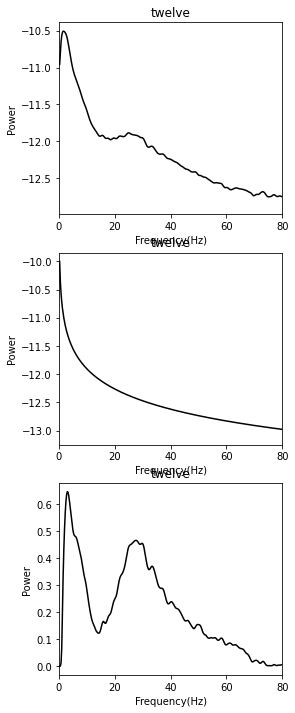

In [8]:
mean_psd, mean_periodic, mean_aperiodic=plot_psds('twelve', sub_task_psds_twelve, sub_aperiodic_twelve, sub_periodic_twelve)

In [9]:
def define_fois(age, freqs, mean_psd, debug=True):
    mean_resid=mean_periodic
    foi_pk_freqs=[]
    foi_pk_vals=[]    
    foi_fwhms=[]
    foi_ranges=[]
    orig_pks,properties=scipy.signal.find_peaks(mean_resid)
    while True:
        pks,properties=scipy.signal.find_peaks(mean_resid)

        pk_vals=mean_resid[pks]
        sorted_idx=np.argsort(-pk_vals)
        pk_vals=pk_vals[sorted_idx]
        pks=pks[sorted_idx]

        pk_idx=pks[0]
        pk_val=pk_vals[0]
        pk_freq=freqs[pk_idx]

        if pk_val<np.std(mean_resid):
            if debug:
                print('Peak val={}, thresh={}'.format(pk_val,.5*np.std(mean_resid)))
            break


        l_idx=np.where(mean_resid[:pk_idx]<=pk_val*.5)[0]
        r_idx=np.where(mean_resid[pk_idx:]<=pk_val*.5)[0]

        if len(l_idx) and len(r_idx):
            l_freq=freqs[l_idx[-1]]
            r_freq=freqs[pk_idx+r_idx[0]]
            r_side=(r_freq-pk_freq)
            l_side=(pk_freq-l_freq)
            fwhm=2*np.min([r_side, l_side])
        elif len(l_idx):
            l_freq=freqs[l_idx[-1]]
            fwhm=2*(pk_freq-l_freq)
        elif len(r_idx):
            r_freq=freqs[pk_idx+r_idx[0]+1]
            fwhm=2*(r_freq-pk_freq)

        l_freq=pk_freq-fwhm*.5
        r_freq=pk_freq+fwhm*.5
        sd=fwhm/(2*np.sqrt(2*np.log(2)))
        A=pk_vals[0]*np.exp(-.5*((freqs-pk_freq)/sd)**2)
        nearest_orig=np.min(np.abs(freqs[np.array(orig_pks)]-pk_freq))

        if pk_val>1.75*np.std(mean_resid) and ((pk_freq<10 and fwhm>1) or (pk_freq>=10 and fwhm>3)) and nearest_orig<3:
            print('Peak: freq={}, val={} (SD={}), width={}, range={}-{}'.format(pk_freq, pk_val, np.std(mean_resid), fwhm, pk_freq-fwhm*.5, pk_freq+fwhm*.5))
            print('Distance to nearest original peak={}'.format(nearest_orig))
            if debug:
                fig=plt.figure(figsize=(12,12))
                ax = fig.add_subplot(3,1,1)
                ax.plot(freqs,mean_resid)
                ax.plot(freqs[pks],mean_resid[pks],'ro')
                ax = fig.add_subplot(3,1,2)
                ax.plot(freqs,mean_resid)
                ax.plot(freqs,A)

                foi_pk_freqs.append(pk_freq)
                foi_pk_vals.append(pk_val)
                foi_fwhms.append(fwhm)
                foi_ranges.append([l_freq,r_freq])
        elif debug:
            if not ((pk_freq<10 and fwhm>1) or (pk_freq>=10 and fwhm>3)):
                print('Peak: freq={}, fhwm={} to narrow'.format(pk_freq, fwhm))
            if pk_val<=2*np.std(mean_resid):
                print('Peak: freq={} too low amplitude'.format(pk_freq))
            if nearest_orig>=3:
                print('Peak: freq={} too far from original peaks'.format(pk_freq))

        mean_resid=mean_resid-A
        #mean_resid[mean_resid<0]=0
    sorted_idx=np.argsort(foi_pk_freqs)

    foi_pk_freqs=np.array(foi_pk_freqs)
    foi_pk_vals=np.array(foi_pk_vals)
    foi_fwhms=np.array(foi_fwhms)
    foi_ranges=np.array(foi_ranges)

    foi_pk_freqs=foi_pk_freqs[sorted_idx]
    foi_pk_vals=foi_pk_vals[sorted_idx]
    foi_fwhms=foi_fwhms[sorted_idx]
    foi_ranges=foi_ranges[sorted_idx,:]

    ax = fig.add_subplot(3,1,3)
    ax.plot(freqs,mean_psd)
    for f_idx in range(foi_ranges.shape[0]):
        sd=foi_fwhms[f_idx]/(2*np.sqrt(2*np.log(2)))
        A=foi_pk_vals[f_idx]*np.exp(-.5*((freqs-foi_pk_freqs[f_idx])/sd)**2)
        ax.plot(freqs,A)
    fig.savefig(r'C:\Users\mgautier\Desktop\DEVMOBETA\eeg_data\devmobeta\data\derivatives\NEARICA_NF\foi_%s.png'%(age))

    return foi_pk_freqs,foi_pk_vals,foi_fwhms,foi_ranges

Peak: freq=3.0, val=0.6460716477392869 (SD=0.16580036356457853), width=3.5, range=1.25-4.75
Distance to nearest original peak=0.0
Peak: freq=27.5, val=0.46557655726503216 (SD=0.14832782474669245), width=16.5, range=19.25-35.75
Distance to nearest original peak=0.0
Peak: freq=6.75 too far from original peaks
Peak: freq=10.0 too far from original peaks
Peak: freq=43.0, val=0.1680294731053395 (SD=0.06019667993891194), width=13.5, range=36.25-49.75
Distance to nearest original peak=2.75
Peak: freq=58.25, val=0.09884169851026382 (SD=0.039037052822862094), width=17.5, range=49.5-67.0
Distance to nearest original peak=0.0
Peak: freq=12.75, fhwm=2.5 to narrow
Peak: freq=12.75 too far from original peaks
Peak: freq=15.75, fhwm=1.5 to narrow
Peak: freq=86.5, fhwm=2.5 to narrow
Peak: freq=86.5 too low amplitude
Peak: freq=50.5, fhwm=2.0 to narrow
Peak: freq=50.5 too low amplitude
Peak val=0.015792515126275046, thresh=0.010236603474855648


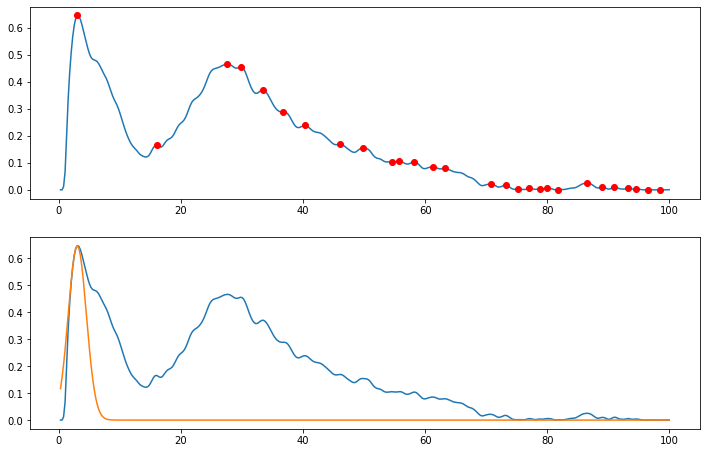

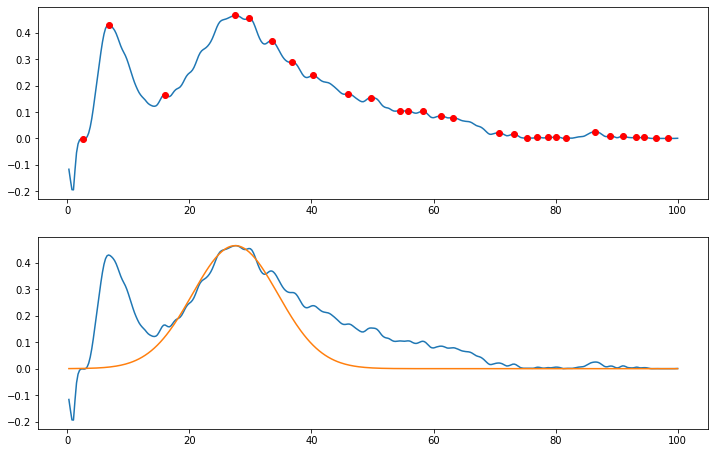

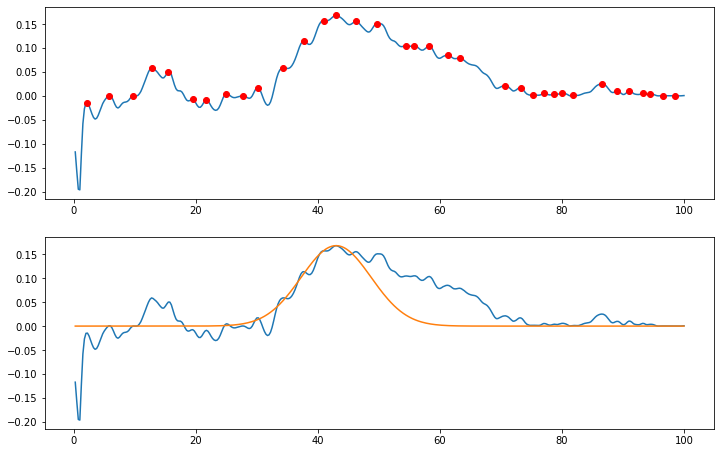

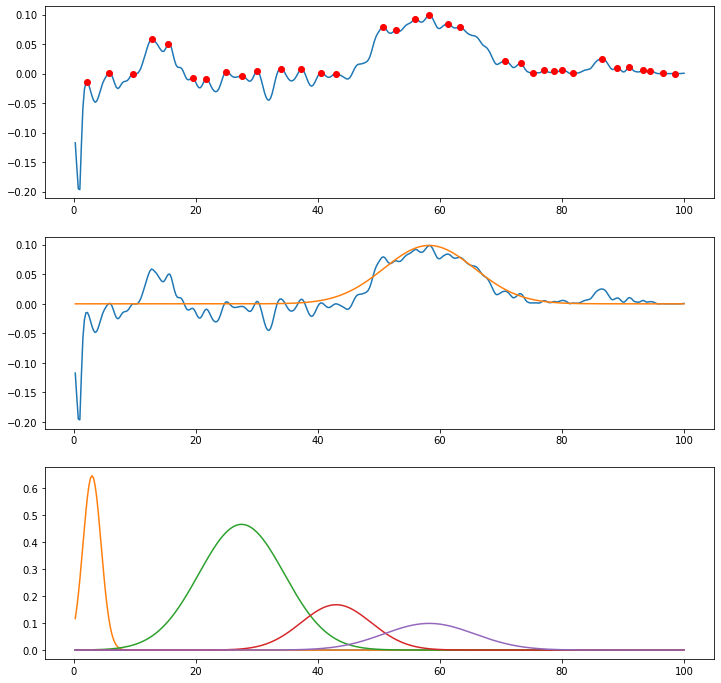

In [10]:
foi_pk_freqs,foi_pk_vals,foi_fwhms,foi_ranges=define_fois('twelve', freqs, mean_psd, debug=True)